# Imports

In [1]:
import torch
from pytorch_pretrained_bert import BertTokenizer

In [2]:
#Vortrainiertes Modell Tokenizer laden (Vokabular) 

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased') 
tokenizer

# Inspect Bert Vocabulary

## Vocab Dump

Ruft die gesamte Liste der "Token" ab und schreibt diese in Textdateien, damit sie durchgesehen werden können.

In [3]:
with open("vocabulary.txt", 'w') as f:
    
    # For each token...
    for token in tokenizer.vocab.keys():
        
        # Write it out and escape any unicode characters.            
        f.write(token + '\n')

Wenn ich mir das Vokabular ansehe, sehe ich das:
Die ersten 999 Token (1-indiziert) scheinen reserviert zu sein, und die meisten haben die Form [unused957].
1 - [PAD]
101 - [UNK]
102 - [CLS]
103 - [SEP]
104 - [MASK]
Die Zeilen 1000-1996 scheinen ein Dump von einzelnen Zeichen zu sein.
Sie scheinen nicht nach Häufigkeit sortiert zu sein (z. B. sind die Buchstaben des Alphabets alle aufeinanderfolgend).
Das erste Wort ist "the" an Position 1997.
Von da an scheinen die Wörter nach Häufigkeit sortiert zu sein.
Die ersten ~18 Wörter sind ganze Wörter, und Nummer 2016 ist ##s, vermutlich das häufigste Teilwort.
Das letzte ganze Wort befindet sich auf Platz 29612, "necessitated".
Einige lustige Einschlüsse:
Starbucks
triassisch
Abolitionist
1679

## Einzelne Zeichen

Der folgende Code gibt alle Einzelzeichen im Vokabular aus, sowie alle Einzelzeichen mit vorangestelltem "##".
Es stellt sich heraus, dass es sich um übereinstimmende Mengen handelt - für jedes einzelne Zeichen gibt es auch eine '##'-Version. Es gibt 997 Einzelzeichen-Token.
Die folgende Zelle iteriert über das Vokabular und zieht alle Einzelzeichen heraus.

In [5]:
one_chars = []
one_chars_hashes = []

# For each token in the vocabulary...
for token in tokenizer.vocab.keys():
    
    # Record any single-character tokens.
    if len(token) == 1:
        one_chars.append(token)
    
    # Record single-character tokens preceded by the two hashes.    
    elif len(token) == 3 and token[0:2] == '##':
        one_chars_hashes.append(token)

In [6]:
print('Number of single character tokens:', len(one_chars), '\n')

# Print all of the single characters, 40 per row.

# For every batch of 40 tokens...
for i in range(0, len(one_chars), 40):
    
    # Limit the end index so we don't go past the end of the list.
    end = min(i + 40, len(one_chars) + 1)
    
    # Print out the tokens, separated by a space.
    print(' '.join(one_chars[i:end]))

Number of single character tokens: 997 

! " # $ % & ' ( ) * + , - . / 0 1 2 3 4 5 6 7 8 9 : ; < = > ? @ [ \ ] ^ _ ` a b
c d e f g h i j k l m n o p q r s t u v w x y z { | } ~ ¡ ¢ £ ¤ ¥ ¦ § ¨ © ª « ¬
® ° ± ² ³ ´ µ ¶ · ¹ º » ¼ ½ ¾ ¿ × ß æ ð ÷ ø þ đ ħ ı ł ŋ œ ƒ ɐ ɑ ɒ ɔ ɕ ə ɛ ɡ ɣ ɨ
ɪ ɫ ɬ ɯ ɲ ɴ ɹ ɾ ʀ ʁ ʂ ʃ ʉ ʊ ʋ ʌ ʎ ʐ ʑ ʒ ʔ ʰ ʲ ʳ ʷ ʸ ʻ ʼ ʾ ʿ ˈ ː ˡ ˢ ˣ ˤ α β γ δ
ε ζ η θ ι κ λ μ ν ξ ο π ρ ς σ τ υ φ χ ψ ω а б в г д е ж з и к л м н о п р с т у
ф х ц ч ш щ ъ ы ь э ю я ђ є і ј љ њ ћ ӏ ա բ գ դ ե թ ի լ կ հ մ յ ն ո պ ս վ տ ր ւ
ք ־ א ב ג ד ה ו ז ח ט י ך כ ל ם מ ן נ ס ע ף פ ץ צ ק ר ש ת ، ء ا ب ة ت ث ج ح خ د
ذ ر ز س ش ص ض ط ظ ع غ ـ ف ق ك ل م ن ه و ى ي ٹ پ چ ک گ ں ھ ہ ی ے अ आ उ ए क ख ग च
ज ट ड ण त थ द ध न प ब भ म य र ल व श ष स ह ा ि ी ो । ॥ ং অ আ ই উ এ ও ক খ গ চ ছ জ
ট ড ণ ত থ দ ধ ন প ব ভ ম য র ল শ ষ স হ া ি ী ে க ச ட த ந ன ப ம ய ர ல ள வ ா ி ு ே
ை ನ ರ ಾ ක ය ර ල ව ා ก ง ต ท น พ ม ย ร ล ว ส อ า เ ་ ། ག ང ད ན པ བ མ འ ར ལ ས မ ა
ბ გ დ ე ვ თ ი კ ლ მ ნ ო რ ს ტ უ ᄀ ᄂ ᄃ ᄅ ᄆ ᄇ ᄉ ᄊ ᄋ ᄌ ᄎ ᄏ ᄐ ᄑ ᄒ ᅡ ᅢ ᅥ ᅦ ᅧ ᅩ ᅪ ᅭ ᅮ

In [7]:
print('Number of single character tokens with hashes:', len(one_chars_hashes), '\n')

# Print all of the single characters, 40 per row.

# Strip the hash marks, since they just clutter the display.
tokens = [token.replace('##', '') for token in one_chars_hashes]

# For every batch of 40 tokens...
for i in range(0, len(tokens), 40):
    
    # Limit the end index so we don't go past the end of the list.
    end = min(i + 40, len(tokens) + 1)
    
    # Print out the tokens, separated by a space.
    print(' '.join(tokens[i:end]))

Number of single character tokens with hashes: 997 

s a e i n o d r y t l m u h k c g p 2 z 1 b 3 f 4 6 7 x v 8 5 9 0 w j q ° ₂ а и
² ₃ ı ₁ ⁺ ½ о ه ي α е د ن ν ø р ₄ ₀ ر я ³ ι ł н ᵢ ₙ ß ة ς م − т ː ل ь к ♭ η ی в
ا × ¹ ы ה ɛ л ! " # $ % & ' ( ) * + , - . / : ; < = > ? @ [ \ ] ^ _ ` { | } ~ ¡
¢ £ ¤ ¥ ¦ § ¨ © ª « ¬ ® ± ´ µ ¶ · º » ¼ ¾ ¿ æ ð ÷ þ đ ħ ŋ œ ƒ ɐ ɑ ɒ ɔ ɕ ə ɡ ɣ ɨ
ɪ ɫ ɬ ɯ ɲ ɴ ɹ ɾ ʀ ʁ ʂ ʃ ʉ ʊ ʋ ʌ ʎ ʐ ʑ ʒ ʔ ʰ ʲ ʳ ʷ ʸ ʻ ʼ ʾ ʿ ˈ ˡ ˢ ˣ ˤ β γ δ ε ζ
θ κ λ μ ξ ο π ρ σ τ υ φ χ ψ ω б г д ж з м п с у ф х ц ч ш щ ъ э ю ђ є і ј љ њ ћ
ӏ ա բ գ դ ե թ ի լ կ հ մ յ ն ո պ ս վ տ ր ւ ք ־ א ב ג ד ו ז ח ט י ך כ ל ם מ ן נ ס
ע ף פ ץ צ ק ר ש ת ، ء ب ت ث ج ح خ ذ ز س ش ص ض ط ظ ع غ ـ ف ق ك و ى ٹ پ چ ک گ ں ھ
ہ ے अ आ उ ए क ख ग च ज ट ड ण त थ द ध न प ब भ म य र ल व श ष स ह ा ि ी ो । ॥ ং অ আ
ই উ এ ও ক খ গ চ ছ জ ট ড ণ ত থ দ ধ ন প ব ভ ম য র ল শ ষ স হ া ি ী ে க ச ட த ந ன ப
ம ய ர ல ள வ ா ி ு ே ை ನ ರ ಾ ක ය ර ල ව ා ก ง ต ท น พ ม ย ร ล ว ส อ า เ ་ ། ག ང ད
ན པ བ མ འ ར ལ ས မ ა ბ გ დ ე ვ თ ი კ ლ მ ნ ო რ ს ტ უ ᄀ ᄂ ᄃ ᄅ ᄆ ᄇ ᄉ ᄊ

In [8]:
print('Are the two sets identical?', set(one_chars) == set(tokens))

Are the two sets identical? True


## Teilwörter vs. Ganze Wörter

Lassen Sie uns einige statistische Daten zum Wortschatz sammeln.

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Maximum token length: 18


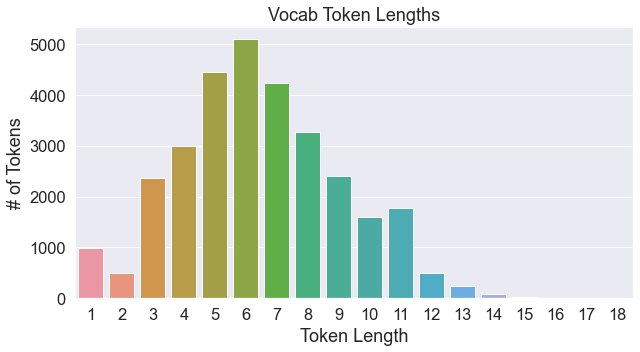

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='darkgrid')

# Vergrößert den Plot und die Schriftgröße.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (10,5)

# Messen der Länge jedes Tokens im Vokabular.
token_lengths = [len(token) for token in tokenizer.vocab.keys()]

# Darstellung der Anzahl der Token jeder Länge.
sns.countplot(token_lengths)
plt.title('Vocab Token Lengths')
plt.xlabel('Token Length')
plt.ylabel('# of Tokens')

print('Maximum token length:', max(token_lengths))

Betrachten wir nur die Token, die mit '##' beginnen.

In [15]:
num_subwords = 0

subword_lengths = []

# For each token in the vocabulary...
for token in tokenizer.vocab.keys():
    
    # If it's a subword...
    if len(token) >= 2 and token[0:2] == '##':
        
        # Tally all subwords
        num_subwords += 1

        # Measure the sub word length (without the hashes)
        length = len(token) - 2

        # Record the lengths.        
        subword_lengths.append(length)

Wie viele "##"-Zeichen gibt es im Vergleich zum vollständigen Wortschatz?

In [16]:
vocab_size = len(tokenizer.vocab.keys())

print('Number of subwords: {:,} of {:,}'.format(num_subwords, vocab_size))

# Calculate the percentage of words that are '##' subwords.
prcnt = float(num_subwords) / vocab_size * 100.0

print('%.1f%%' % prcnt)

Number of subwords: 5,828 of 30,522
19.1%


Aufzeichnen der Teilwortlängen (ohne die beiden "##"-Zeichen)

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '# of ## Subwords')

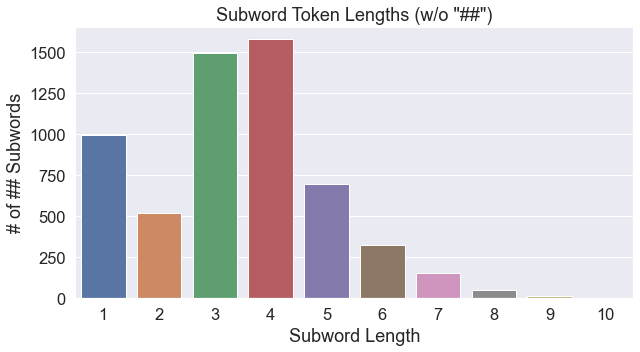

In [20]:
sns.countplot(subword_lengths)
plt.title('Subword Token Lengths (w/o "##")')
plt.xlabel('Subword Length')
plt.ylabel('# of ## Subwords')

## Rechtschreibfehler

In [21]:
'misspelled' in tokenizer.vocab # Right

False

In [22]:
'mispelled' in tokenizer.vocab # Wrong

False

In [23]:
'government' in tokenizer.vocab # Right

True

In [24]:
'goverment' in tokenizer.vocab # Wrong

False

In [25]:
'beginning' in tokenizer.vocab # Right

True

In [26]:
'begining' in tokenizer.vocab # Wrong

False

In [27]:
'separate' in tokenizer.vocab # Right

True

In [28]:
'seperate' in tokenizer.vocab # Wrong

False

## Was ist mit Apostrophen?

In [29]:
"can't" in tokenizer.vocab

False

In [30]:
"cant" in tokenizer.vocab

False

## Anfangs- vs. Mittelteilwörter

Für einzelne Zeichen gibt es sowohl die Einzelzeichen- als auch die "##"-Version für jedes Zeichen. Gilt das auch für Teilwörter?

In [32]:
# Für jedes Token des Vokabulars...
for token in tokenizer.vocab.keys():
    
    # Wenn es ein Teilwort ist...
    if len(token) >= 2 and token[0:2] == '##':
        if not token[2:] in tokenizer.vocab:
            print('Did not find a token for', token[2:])
            break

Did not find a token for ly


In [33]:
'##ly' in tokenizer.vocab

True

In [34]:
'ly' in tokenizer.vocab

False

## Namen

In [38]:
import wget
import random 

print('Beginning file download with wget module')

url = 'http://www.gutenberg.org/files/3201/files/NAMES.TXT'
wget.download(url, 'first-names.txt')

Beginning file download with wget module
100% [........................................................] 179353 / 179353

'first-names.txt'

In [39]:
# Einlesen.
with open('first-names.txt', 'rb') as f:
    names_encoded = f.readlines()

names = []

# Dekodierung der Namen, Umwandlung in Kleinbuchstaben und Entfernen von Zeilenumbrüchen.
for name in names_encoded:
    try:
        names.append(name.rstrip().lower().decode('utf-8'))
    except:
        continue

print('Number of names: {:,}'.format(len(names)))
print('Example:', random.choice(names))


Number of names: 21,985
Example: baptlsta


In [40]:
num_names = 0

# Für jeden Namen in unserer Liste...
for name in names:

    # Wenn es im Vokabular steht...
    if name in tokenizer.vocab:
        # Abrechnen.
        num_names += 1

print('{:,} names in the vocabulary'.format(num_names))

3,869 names in the vocabulary


**Weitere Forschung**
* Weitere moderne Namen hinzufügen
    * Dieses Repo / diese Datei enthält einige modernere Namen. Der Dateidownload funktioniert allerdings nicht.
    * `https://raw.githubusercontent.com/arineng/arincli/master/lib/male-first-names.txt`
* Hinzufügen von gebräuchlichen Namen aus anderen Sprachen.

## Zahlen

In [41]:
# Zählen, wie viele Zahlen im Wortschatz enthalten sind.
count = 0

# Für jedes Token des Vokabulars...
for token in tokenizer.vocab.keys():

    # Zählen, wenn es eine Zahl ist.
    if token.isdigit():
        count += 1
        
        # Beliebige Zahlen >= 10,000?
        if len(token) > 4:
            print(token)

print('Vocab includes {:,} numbers.'.format(count))

Vocab includes 881 numbers.


In [42]:
# Zählen, wie viele Daten zwischen 1600 und 2021 enthalten sind.
count = 0 
for i in range(1600, 2021):
    if str(i) in tokenizer.vocab:
        count += 1

print('Vocab includes {:,} of 421 dates from 1600 - 2021'.format(count))

Vocab includes 384 of 421 dates from 1600 - 2021
